## 1. La legge dei grandi numeri

La legge dei grandi numeri Ã¨ un teorema fondamentale della teoria della probabilitÃ  che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterÃ  un determinato evento (testa/croce) si avvicinerÃ  a una costante. Questa a sua volta sarÃ  la probabilitÃ  che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che Ã¨ uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





Frequenza percentuale di volte che Ã¨ uscita testa:
 [np.float64(50.27027027027027), np.float64(49.73954763536669), np.float64(50.30959752321982), np.float64(50.11503067484663), np.float64(49.11832353692819), np.float64(49.92099384296845), np.float64(50.72371762315896), np.float64(49.670619235836625), np.float64(49.64006739163731), np.float64(49.70878869183954), np.float64(50.21385291671617), np.float64(51.93596425912137), np.float64(49.40808195788276), np.float64(49.46689809075131), np.float64(50.62522329403358), np.float64(49.916666666666664), np.float64(50.29640506879861), np.float64(49.063842848373234), np.float64(50.77044646384829), np.float64(49.71240755957272), np.float64(49.80061349693251), np.float64(49.661434287473064), np.float64(58.333333333333336), np.float64(49.84496124031008), np.float64(48.98381404405501), np.float64(50.96373734073833), np.float64(49.71041610977457), np.float64(49.01453957996769), np.float64(50.44910179640718), np.float64(49.24063449206885), np.float64(

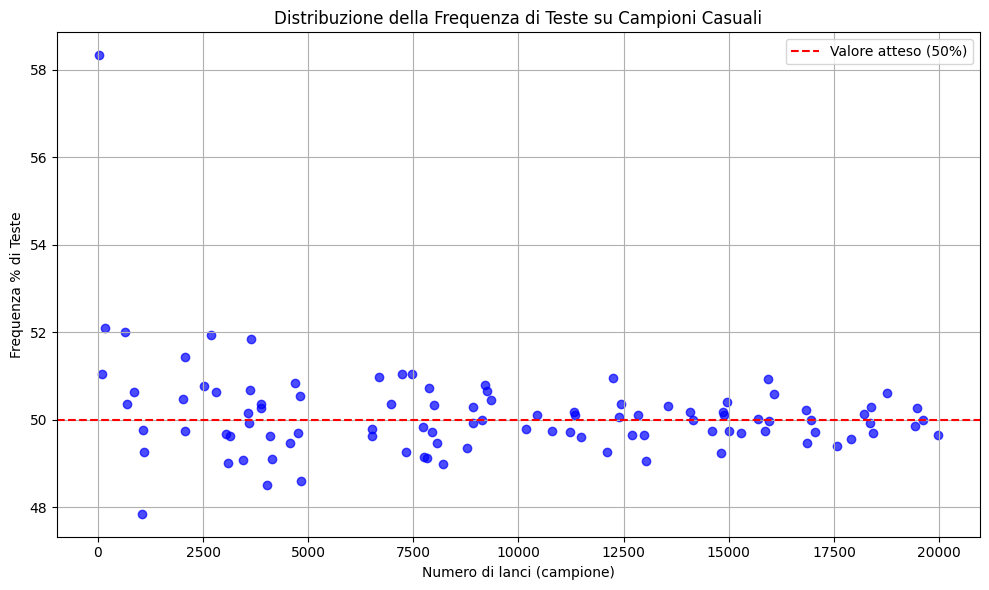

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che Ã¨ uscita testa
def lancio_moneta(N):
    lanci = np.random.binomial(n=1, p=0.5, size=N)
    testa = N - np.sum(lanci)
    freq_t = testa/N * 100
    return freq_t

# frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000
n_lanci = np.random.randint(10, 20001, size=100)
frequenza_t = [lancio_moneta(i) for i in n_lanci]
print("Frequenza percentuale di volte che Ã¨ uscita testa:\n",frequenza_t)

# plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
plt.figure(figsize=(10, 6))
plt.scatter(n_lanci, frequenza_t, color='blue', alpha=0.7)
plt.axhline(50, color='red', linestyle='--', label='Valore atteso (50%)')
plt.xlabel("Numero di lanci (campione)")
plt.ylabel("Frequenza % di Teste")
plt.title("Distribuzione della Frequenza di Teste su Campioni Casuali")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore piÃ¹ frequente
- Rimuovi le righe dove il valore di 'Age' Ã¨ mancante
- Controlla se ci sono righe duplicate
- Calcola l'etÃ  media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di etÃ  riempili con il valore medio
- Visualizza la distribuzione dell'etÃ  per classe
- Visualizza la distribuzione dell'etÃ  per classe dividendo e mmostrando insieme i dati di uomini e donne

In [163]:
# ðŸ“¦ Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Dimensioni del dataset: (891, 12)
Valori mancanti:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Righe duplicate:  0
EtÃ  media per classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


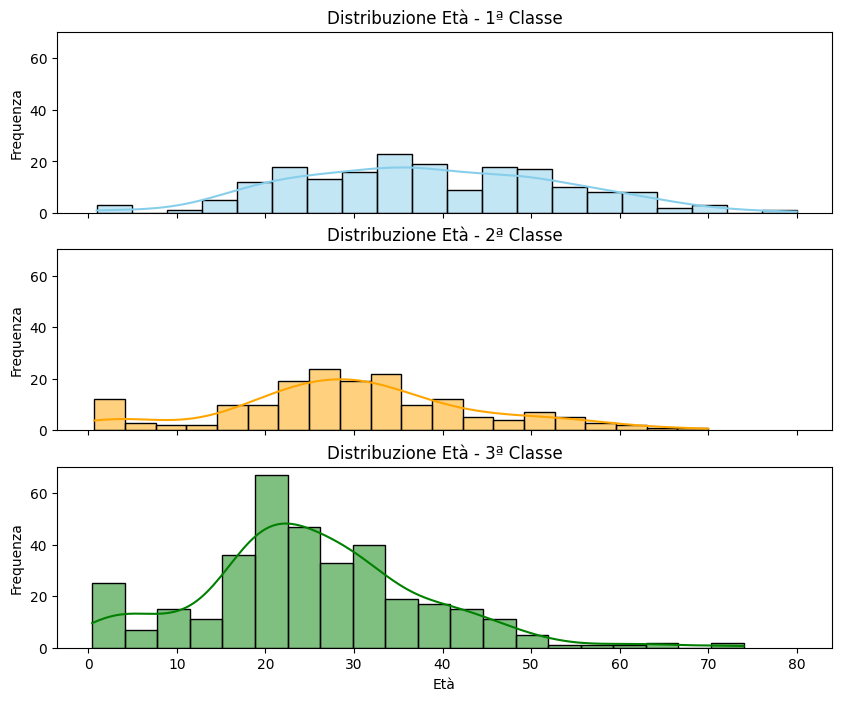

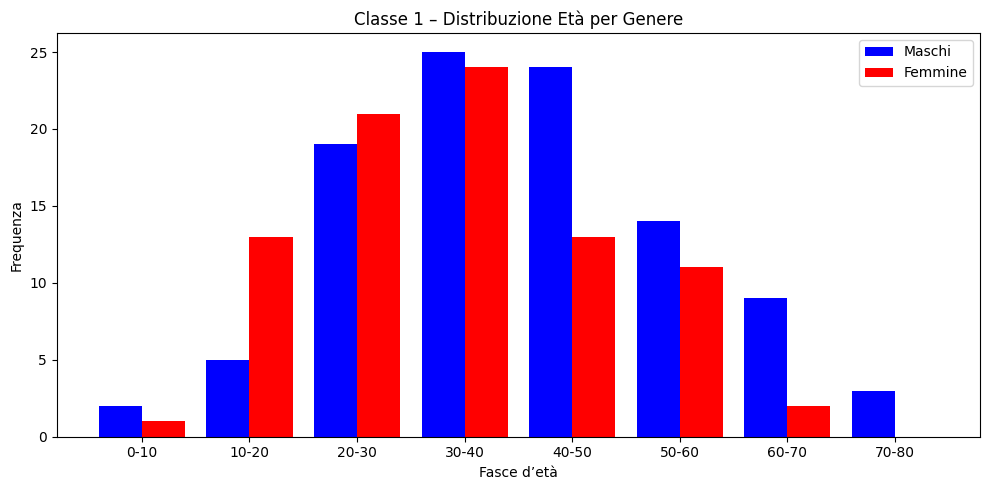

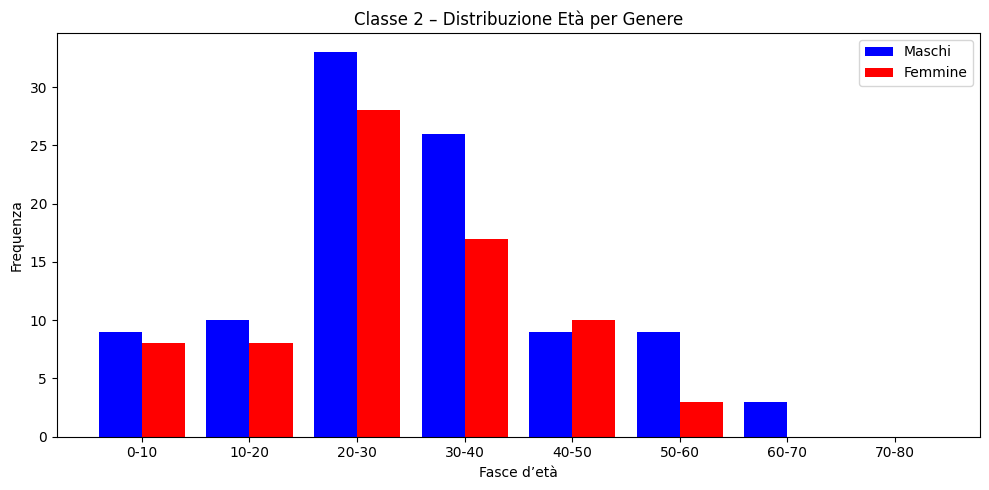

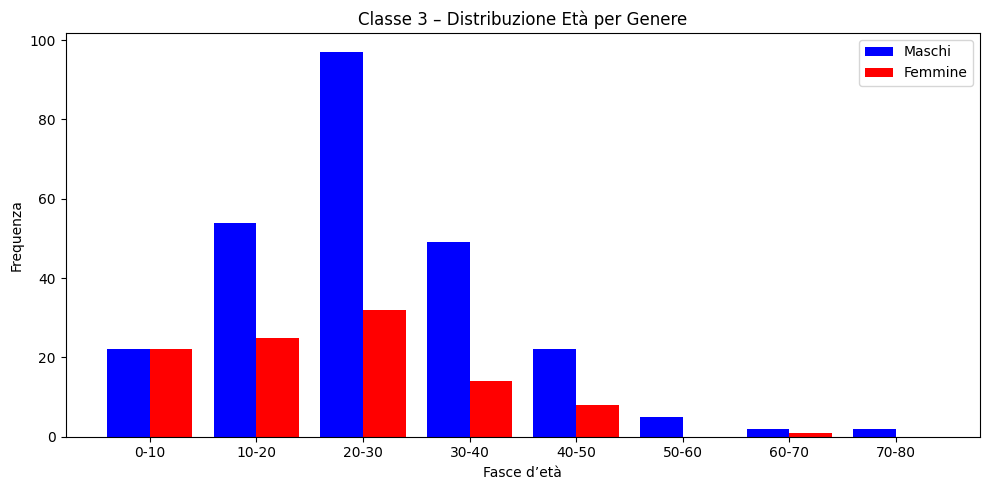

In [164]:
print("Dimensioni del dataset:", df.shape)  # (righe, colonne)

print("Valori mancanti:")
print(df.isna().sum())

# sostituisco i valori mancanti di 'Embarked', con quello piÃ¹ frequente
Embarked_moda = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(Embarked_moda)

# rimuovo le righe dove 'Age' Ã¨ mancante
df = df[df['Age'].notna()]

print("\nRighe duplicate: ", df.duplicated().sum())

print("EtÃ  media per classe:")
print(df.groupby('Pclass')['Age'].mean())


# Ditribuzione dell'etÃ  per classe
# Impostazioni della figura: 3 subplot in verticale con dimensioni personalizzate
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

# Primo grafico: Passeggeri di 1Âª classe
sns.histplot(data=df[df['Pclass'] == 1], x='Age', ax=ax1, bins=20, kde=True, color='skyblue')
ax1.set_title('Distribuzione EtÃ  - 1Âª Classe')

# Secondo grafico: Passeggeri di 2Âª classe
sns.histplot(data=df[df['Pclass'] == 2], x='Age', ax=ax2, bins=20, kde=True, color='orange')
ax2.set_title('Distribuzione EtÃ  - 2Âª Classe')

# Terzo grafico: Passeggeri di 3Âª classe
sns.histplot(data=df[df['Pclass'] == 3], x='Age', ax=ax3, bins=20, kde=True, color='green')
ax3.set_title('Distribuzione EtÃ  - 3Âª Classe')

# Etichetta asse x
ax3.set_xlabel('EtÃ ')
ax1.set_ylabel('Frequenza')
ax2.set_ylabel('Frequenza')
ax3.set_ylabel('Frequenza')

plt.show()


# Distribuzione maschi/femmine
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Ciclo sulle tre classi
for pclass in [1, 2, 3]:
    # Filtro per classe
    df_class = df[df['Pclass'] == pclass]

    # Raggruppamento per fascia d'etÃ  e sesso
    grouped = df_class.groupby(['AgeGroup', 'Sex'], observed=False).size().unstack(fill_value=0)


    # Estrai frequenze per maschi e femmine
    freq_m = grouped.get('male', pd.Series([0]*len(labels), index=labels))
    freq_f = grouped.get('female', pd.Series([0]*len(labels), index=labels))

    # Coordinate X e larghezza barre
    x = np.arange(len(labels))
    bar_width = 0.4

    # Crea il grafico
    plt.figure(figsize=(10, 5))
    plt.bar(x - bar_width/2, freq_m, width=bar_width, label='Maschi', color='blue')
    plt.bar(x + bar_width/2, freq_f, width=bar_width, label='Femmine', color='red')
    plt.title(f'Classe {pclass} â€“ Distribuzione EtÃ  per Genere')
    plt.xlabel('Fasce dâ€™etÃ ')
    plt.ylabel('Frequenza')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Distribuzione delle specie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistiche dei petali per specie:
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


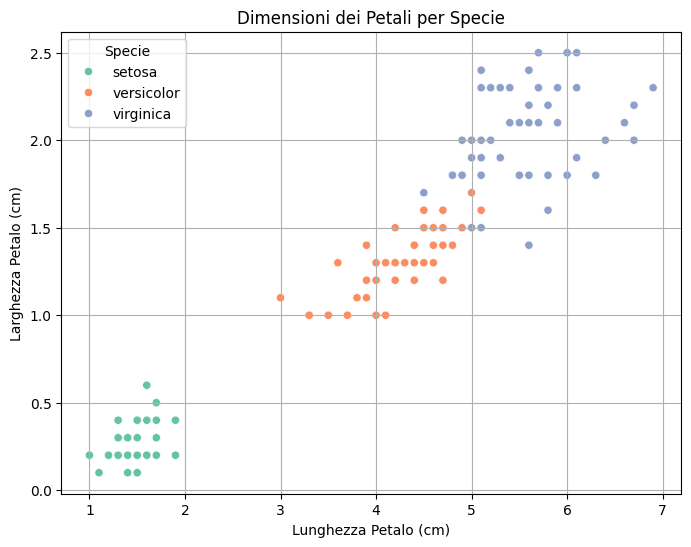

Colonna dell'area dei petali:
  species  petal_area
0  setosa        0.28
1  setosa        0.28
2  setosa        0.26
3  setosa        0.30
4  setosa        0.28
Media dell'area:
species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64


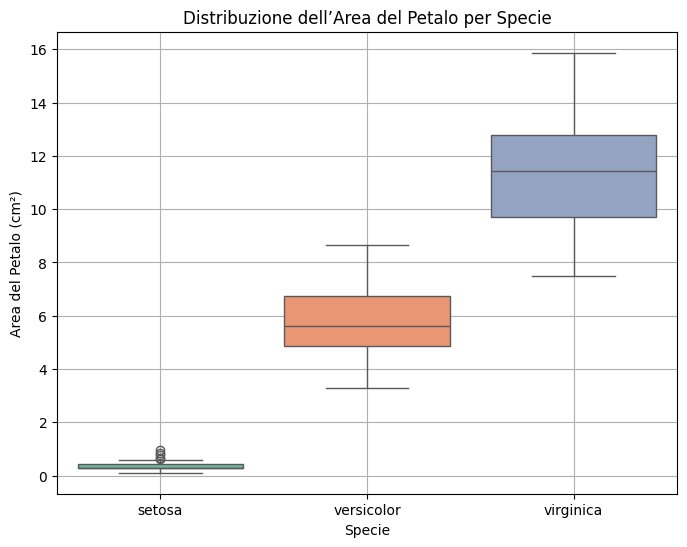

In [167]:
# Distribuzione delle specie
print("Distribuzione delle specie:")
print(df['species'].value_counts())

# Lunghezza e la larghezza media dei petali per specie
print("\nStatistiche dei petali per specie:")
print(df.groupby('species')[['petal_length', 'petal_width']].mean())

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.title('Dimensioni dei Petali per Specie')
plt.xlabel('Lunghezza Petalo (cm)')
plt.ylabel('Larghezza Petalo (cm)')
plt.legend(title='Specie')
plt.grid(True)
plt.show()

# Nuova colonna per l'area del petalo
df['petal_area'] = df['petal_length'] * df['petal_width']
print("Colonna dell'area dei petali:")
print(df[['species', 'petal_area']].head())
print("Media dell'area:")
print(df.groupby('species')['petal_area'].mean())

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='petal_area', hue='species', palette='Set2', legend=False)
plt.title('Distribuzione dellâ€™Area del Petalo per Specie')
plt.xlabel('Specie')
plt.ylabel('Area del Petalo (cmÂ²)')
plt.grid(True)
plt.show()
